# Run Correlation-Based Analyses

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a correlation between a dependent variable and an independent variable is statistically significant using permutation analysis. 

Further, follow this up with a contrast analysis which sees which categorical variables have significantly different correlations from each other. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [ ]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/resources/datasets/TMS_studies_influencing_memory/metadata/master_list.csv'
sheet = None #'master_list_proper_subjects' ?

In [ ]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/ccm_memory/results/notebook_10/tms_meta_analysis/test'

In [ ]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()
data_df


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [ ]:
len(data_df['study'].unique())

In [ ]:
data_df.columns

In [ ]:
drop_list = ['all_datasets_unweighted_avg_r_map_average_target_in_subject', 'Pre_Post_Memory_Effect_Size__Cohen_s_D_']

In [ ]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

Set the parameters for dropping rows

In [ ]:
data_df.columns

In [11]:
column = 'Memory_Primary_Outcome'  # The column you'd like to evaluate
condition = 'not'  # Thecondition to check ('equal', 'above', 'below', 'not')
value = 1 # The value to compare against

In [12]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
data_df

,study,PMID,DOI,ses,N,Reported_Outcome,Pre_Post_Memory_Effect_Size__Cohen_s_D_,Location,List_of_Coordinates,Side,...,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_weighted_avg_r_map_pcc_inverse_r_map_num_in_roi,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_spatial_corr,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_cosine,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_sum,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_subject_in_target,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject,all_datasets_unweighted_avg_r_map_pcc_inverse_r_map_num_in_roi
3,Avirame 2016,27159441,10.1097/YCT.0000000000000286,dlPFC__hfrTMS,11.0,Improved,0.570039,dlPFC,"[-43, 35, 30]",NaN,...,43.414462,0.000326,0.535981,0.0,-0.013834,-0.014040,-29.325071,-0.000217,-0.362038,0.0
4,Bagattini 2020b,33002645,10.1016/j.brs.2020.09.010,dlPFC_L_hfrTMS,50.0,Improved,0.275026,dlPFC,"[-43, 35, 30]",L,...,43.414462,0.000326,0.535981,0.0,-0.013834,-0.014040,-29.325071,-0.000217,-0.362038,0.0
6,Berkers 2017,28068640,10.1016/j.cortex.2016.12.015,Vertex_L_R_thetaTMS,17.0,Improved,0.164150,Vertex,"[0, -10, 74]",L_R,...,-4.578333,-0.000034,-0.084784,0.0,-0.011997,-0.012166,-20.747768,-0.000153,-0.384218,0.0
7,Berkers 2017,28068640,10.1016/j.cortex.2016.12.015,mPFC_L_R_thetaTMS,17.0,Improved,-0.328300,mPFC,"[0, 68, -2]",L_R,...,-19.383716,-0.000145,-0.346138,0.0,0.022775,0.022594,39.239549,0.000290,0.700706,0.0
8,Blumenfeld 2013,24316198,10.1016/j.neuropsychologia.2013.11.021,dlPFC_L_thetaTMS,29.0,Improved,-0.286484,dlPFC,"[-43, 35, 30]",L,...,43.414462,0.000326,0.535981,0.0,-0.013834,-0.014040,-29.325071,-0.000217,-0.362038,0.0
9,Blumenfeld 2013,24316198,10.1016/j.neuropsychologia.2013.11.021,vlPFC_L_thetaTMS,29.0,Impaired,0.286484,vlPFC,"[-51, 25, 12]",L,...,5.821231,0.000044,0.071867,0.0,0.015170,0.014955,31.236532,0.000231,0.385636,0.0
14,Cui 2019,32636777,https://doi.org/10.3389/fpsyg.2020.01137,dlPFC_R_hfrTMS,32.0,Improved,0.248243,dlPFC,"[-43, 35, 30]",R,...,43.414462,0.000326,0.535981,0.0,-0.013834,-0.014040,-29.325071,-0.000217,-0.362038,0.0
16,Du 2022,36186505,10.5498/wjp.v12.i9.1169,dlPFC_L_hfrTMS,47.0,Improved,0.962381,dlPFC,"[-43, 35, 30]",L,...,43.414462,0.000326,0.535981,0.0,-0.013834,-0.014040,-29.325071,-0.000217,-0.362038,0.0
20,Hanslmayr 2014,24684933,10.1016/j.cub.2014.03.007,IFG_L_hfrTMS,19.0,Impaired,0.583212,IFG,"[-48, 9, 30]",L,...,18.677898,0.000140,0.230591,0.0,-0.015319,-0.015524,-32.425677,-0.000240,-0.400317,0.0
21,Hanslmayr 2014,24684933,10.1016/j.cub.2014.03.007,IFG_L_hfrTMS,19.0,Impaired,-0.116642,IFG,"[-48, 9, 30]",L,...,18.677898,0.000140,0.230591,0.0,-0.015319,-0.015524,-32.425677,-0.000240,-0.400317,0.0


Regress out a Covariate

In [ ]:
data_df.columns

In [ ]:
lis = ['Pre_Post_Memory_Effect_Size__Cohen_s_D_']

In [ ]:
from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# use this code block to regress out covariates. Generally better to just include as covariates in a model..
dependent_variable_list = lis
regressors = ['Disease']

data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
print(adjusted_dep_vars_list)

**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [ ]:
data_df.columns

In [ ]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['TOTAL11']

In [ ]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

# 02 - Perform Basic Correlation

In [ ]:
data_df.columns

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Split by sign of the memory effect
pos_group = data_df.loc[data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] > 0, x_col].dropna()
neg_group = data_df.loc[data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] < 0, x_col].dropna()

# Welch t-test (parametric, unequal variances)
t_stat, p_val = ttest_ind(pos_group, neg_group, equal_var=False)

# Mann–Whitney U (non-parametric)
mwu_stat, mwu_p = mannwhitneyu(pos_group, neg_group, alternative='two-sided')

print(f"T-statistic: {t_stat:.4f}, p-value: {p_val:.4g}")
print(f"Mann-Whitney U statistic: {mwu_stat:.4f}, p-value: {mwu_p:.4g}")

# ── Plot mean ± SEM ────────────────────────────────────────────────────────────
boxplot_df = pd.concat(
    [
        pos_group.to_frame(name=x_col).assign(Group='Positive Effect'),
        neg_group.to_frame(name=x_col).assign(Group='Negative Effect')
    ],
    ignore_index=True
)

means = boxplot_df.groupby('Group')[x_col].mean()
sems  = boxplot_df.groupby('Group')[x_col].sem()

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=means.index, y=means.values, palette="Set2", ci=None)
ax.errorbar(
    x=np.arange(len(means)),
    y=means.values,
    yerr=sems.values,
    fmt='none',
    ecolor='black',
    capsize=4,
    lw=1
)

ax.set_title('Mean Spatial Correlation by Memory Effect Group (±SEM)')
ax.set_ylabel('Spatial Correlation')
ax.set_xlabel('Memory Effect Group')
plt.tight_layout()
plt.show()


In [ ]:
# ── Raincloud plot: violin + jitter (strip) ────────────────────────────────────
plt.figure(figsize=(6, 4))

# Violin (distribution “cloud”)
sns.violinplot(
    data=boxplot_df,
    x='Group',
    y=x_col,
    palette='Set2',
    inner=None,      # no box inside the violin
    cut=0,           # trim tails to data range
    linewidth=0
)

# Jittered points (“rain”)
sns.stripplot(
    data=boxplot_df,
    x='Group',
    y=x_col,
    color='k',
    size=4,
    jitter=0.25,
    alpha=0.7
)

plt.title('Raincloud Plot of Spatial Correlation by Memory Effect Group')
plt.ylabel('Spatial Correlation')
plt.xlabel('Memory Effect Group')
plt.tight_layout()
plt.show()


In [ ]:
# data_df = data_df[data_df['Pre_Post_Memory_Effect_Size__Cohen_s_D_'] > -2]

In [16]:
data_df.columns

Index(['study', 'PMID', 'DOI', 'ses', 'N', 'Reported_Outcome',
       'Pre_Post_Memory_Effect_Size__Cohen_s_D_', 'Location',
       'List_of_Coordinates', 'Side', 'Frequency__Hz_', 'Magnitude__V_',
       'Stim_Relative_to_Memory_Cycle', 'Stim_Info', 'Closed_Loop',
       'Years_Between_Measurements', 'Mean_Age', 'Stdev_Age', 'Percent_Female',
       'Disease', 'Test', 'Recall_Subtype', 'Sensory_Domain',
       'Memory_Primary_Outcome', 'Control_Group', 'Notes', 'pooled_stdev',
       'experimental_baseline_mean', 'experimental_baseline_stdev', 'N_1',
       'Break', 'experimental_post_mean', 'experimental_post_stdev',
       'experimental_post_n', 'PDF_Downloaded', 'PDF_Path', 'Break_1',
       'Is_the_primary_outcome_of_this_manuscript_about_memory___Yes_No_',
       'Does_this_manuscript_use_transcranial_magnetic_stimulation__TMS____Yes_No_',
       'Does_this_manuscript_report_memory_outcomes___Yes_No_',
       'To_what_region_of_the_brain_was_TMS_delivered',
       'Did_the_study_

In [17]:
x_col = 'all_datasets_weighted_avg_r_map_pcc_inverse_r_map_average_target_in_subject'
y_col = 'Pre_Post_Memory_Effect_Size__Cohen_s_D_'

<Figure size 432x432 with 0 Axes>

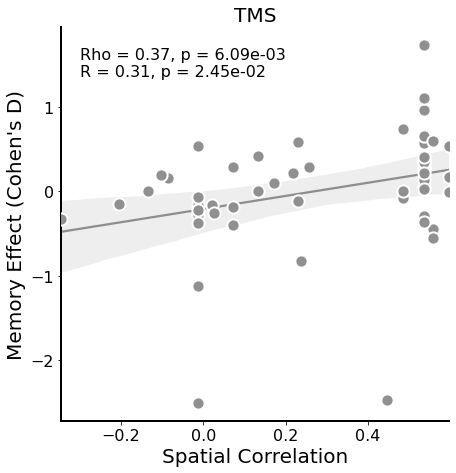

In [18]:
from calvin_utils.statistical_utils.scatterplot import simple_scatter
simple_scatter(data_df, x_col, y_col, 'TMS', 
               x_label="Spatial Correlation",
               y_label='Memory Effect (Cohen\'s D)',
               out_dir=out_dir, flip_axes=False)

# Correlate Variable with All Other Variables

In [ ]:
from calvin_utils.statistical_utils.correlation_barplot import CorrelationBarPlot
plotter = CorrelationBarPlot(data_df, x_col=x_col, method="spearman")
corr_series = plotter.run(save_path=None)

Focus on correlations above a threhsold

In [ ]:
strong_corrs = plotter.plot_threshold(0.4)      # |r| ≥ 0.4 plot